In [25]:
import pandas as pd

df = pd.read_csv("data/mp_data1.csv")
df.head()

,ID,sender,sender_type,sender_id,ended_on,duration,time_run,time_render,time_show,time_end,...,response,response_action,prime,target,condition,soa_condition,congruence,correct_response,correctResponse,correct
0,4549,Wecome0,canvas.Screen,0,timeout,493.6,1601.9,1596.916,1600.1,2077.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4549,Wecome1,canvas.Screen,1,timeout,492.2,2080.9,2077.600,2093.7,2569.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4549,Wecome2,canvas.Screen,2,timeout,494.0,2571.2,2569.500,2585.9,3063.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4549,Wecome3,canvas.Screen,3,timeout,508.6,3065.5,3063.000,3079.9,3572.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4549,Instructions1,canvas.Screen,4,response,22964.5,3573.9,3572.500,3588.5,26553.0,...,NaN,keypress,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df = df[df["sender"] == "target"]

In [27]:
df["response_action"] = df["response_action"].str.extract("keypress\((.*)\)")
df.head()

,ID,sender,sender_type,sender_id,ended_on,duration,time_run,time_render,time_show,time_end,...,response,response_action,prime,target,condition,soa_condition,congruence,correct_response,correctResponse,correct
14,4549,target,canvas.Screen,10_0_4,response,840.0,60076.1,60070.4,60085.5,60925.5,...,response_natural,n,snjghf,SHEEP,practice,practice,practice,n,n,False
20,4549,target,canvas.Screen,10_1_4,response,643.3,61641.0,61635.1,61650.9,62294.2,...,response_natural,n,abjdhjs,HORSE,practice,practice,practice,n,n,False
26,4549,target,canvas.Screen,10_2_4,response,782.7,62991.0,62985.4,63000.4,63783.1,...,response_manmade,m,nvoiuh,HOUSE,practice,practice,practice,m,m,False
32,4549,target,canvas.Screen,10_3_4,response,839.9,64501.5,64499.8,64513.8,65353.7,...,response_manmade,m,iweonf,BOAT,practice,practice,practice,m,m,False
41,4549,target,canvas.Screen,12_0_0_0_5,response,742.4,67989.8,67987.1,67997.8,68740.2,...,response_manmade,m,desk,CANDY,Inc_Synth_Synth,long,incongruent,m,m,False


In [28]:
df["correct"] = df["response_action"] == df["correct_response"]
df.head()

,ID,sender,sender_type,sender_id,ended_on,duration,time_run,time_render,time_show,time_end,...,response,response_action,prime,target,condition,soa_condition,congruence,correct_response,correctResponse,correct
14,4549,target,canvas.Screen,10_0_4,response,840.0,60076.1,60070.4,60085.5,60925.5,...,response_natural,n,snjghf,SHEEP,practice,practice,practice,n,n,True
20,4549,target,canvas.Screen,10_1_4,response,643.3,61641.0,61635.1,61650.9,62294.2,...,response_natural,n,abjdhjs,HORSE,practice,practice,practice,n,n,True
26,4549,target,canvas.Screen,10_2_4,response,782.7,62991.0,62985.4,63000.4,63783.1,...,response_manmade,m,nvoiuh,HOUSE,practice,practice,practice,m,m,True
32,4549,target,canvas.Screen,10_3_4,response,839.9,64501.5,64499.8,64513.8,65353.7,...,response_manmade,m,iweonf,BOAT,practice,practice,practice,m,m,True
41,4549,target,canvas.Screen,12_0_0_0_5,response,742.4,67989.8,67987.1,67997.8,68740.2,...,response_manmade,m,desk,CANDY,Inc_Synth_Synth,long,incongruent,m,m,True


In [29]:
set(df["correct"])

{False, True}

In [30]:
df.columns

Index(['ID', 'sender', 'sender_type', 'sender_id', 'ended_on', 'duration',
       'time_run', 'time_render', 'time_show', 'time_end', 'time_commit',
       'timestamp', 'time_switch', 'response', 'response_action', 'prime',
       'target', 'condition', 'soa_condition', 'congruence',
       'correct_response', 'correctResponse', 'correct'],
      dtype='object')

In [31]:
data = df.loc[:, ["ID", "duration", "condition", "soa_condition", "correct", "congruence"]]
data.head()

,ID,duration,condition,soa_condition,correct,congruence
14,4549,840.0,practice,practice,True,practice
20,4549,643.3,practice,practice,True,practice
26,4549,782.7,practice,practice,True,practice
32,4549,839.9,practice,practice,True,practice
41,4549,742.4,Inc_Synth_Synth,long,True,incongruent


In [32]:
data = data[data["condition"] != "practice"]
data.head(5)

,ID,duration,condition,soa_condition,correct,congruence
41,4549,742.4,Inc_Synth_Synth,long,True,incongruent
48,4549,861.8,Inc_Nat_Nat,long,False,incongruent
55,4549,725.9,Con_Nat,long,True,congruent
62,4549,796.7,Con_Nat,long,True,congruent
69,4549,815.1,Inc_Synth_Synth,long,True,incongruent


<Axes: xlabel='soa_condition', ylabel='duration'>

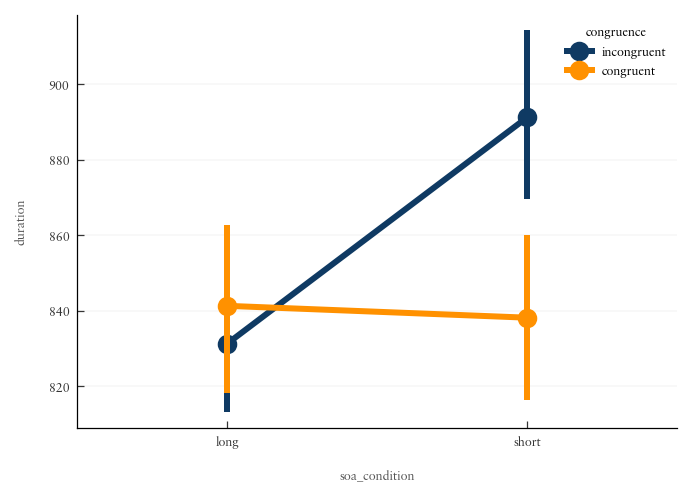

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("minimal")

sns.pointplot(data=data, x="soa_condition", y="duration", hue="congruence")
plt.show()

In [34]:
data = data[data["correct"] == True]
data.head()

,ID,duration,condition,soa_condition,correct,congruence
41,4549,742.4,Inc_Synth_Synth,long,True,incongruent
55,4549,725.9,Con_Nat,long,True,congruent
62,4549,796.7,Con_Nat,long,True,congruent
69,4549,815.1,Inc_Synth_Synth,long,True,incongruent
76,4549,673.5,Inc_Synth_Synth,long,True,incongruent


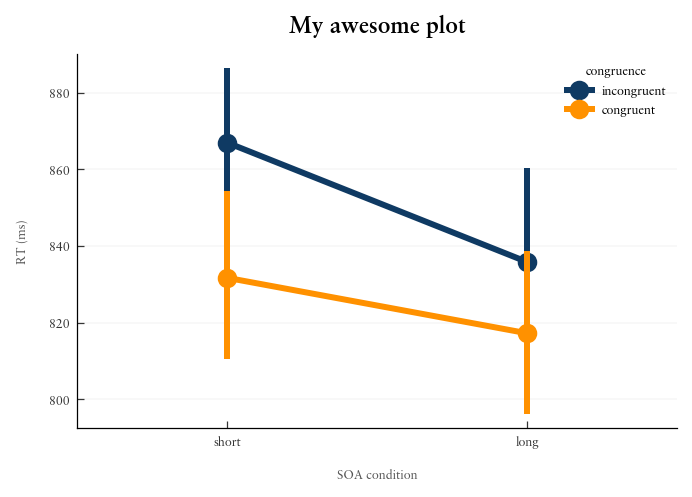

In [35]:
sns.pointplot(data=data, x="soa_condition", y="duration", hue="congruence", order=["short", "long"])
plt.ylabel("RT (ms)")
plt.xlabel("SOA condition")
plt.title("My awesome plot")
sns.despine()

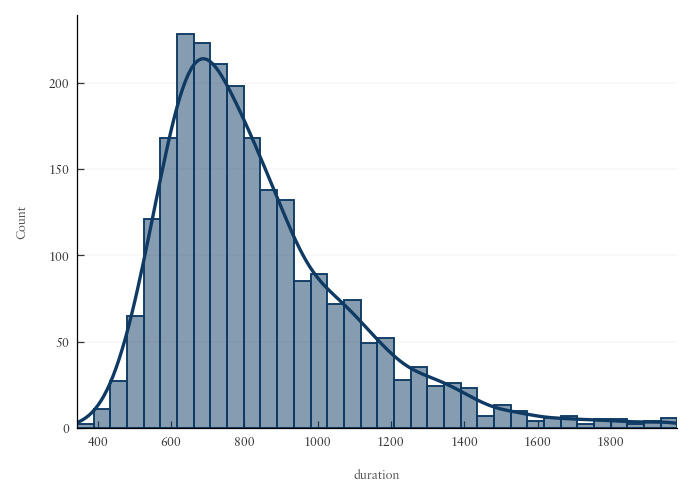

In [37]:
import seaborn as sns

sns.histplot(data["duration"], kde = True)
plt.show()